In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

from sklearn.preprocessing import LabelEncoder


import numpy as np
import glob
import math
import seaborn as sns 
import matplotlib.pyplot as plt
import toad
import pickle
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr


from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, \
    precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve 

import warnings
warnings.filterwarnings('ignore')

https://www.openintro.org/data/index.php?data=loans_full_schema

https://www.kaggle.com/code/faressayah/lending-club-loan-defaulters-prediction

# Data Loading

In [2]:
pd.options.display.max_columns = None
df=pd.read_csv('loan_data_2007_2014.csv',low_memory=False)



In [15]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history_tenure_years,credit_history_tenure_months,earliest_cr_line_month,credit_pull_months,loan_to_income_ratio
0,5000,36 months,10.65,162.87,B2,10.0,RENT,24000.0,Verified,2011-12-01,1,credit_card,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5000.00,861.07,0.00,0.00,0.00,0.0,0.0,-9999.0,-9999.0,-9999.0,26.913073,323,1.0,-49,0.208333
1,2500,60 months,15.27,59.83,C4,0.0,RENT,30000.0,Source Verified,2011-12-01,0,car,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,456.46,435.17,0.00,117.08,1.11,0.0,0.0,-9999.0,-9999.0,-9999.0,12.668036,152,4.0,-21,0.083333
2,2400,36 months,15.96,84.33,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,1,small_business,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,2400.00,603.65,0.00,0.00,0.00,0.0,0.0,-9999.0,-9999.0,-9999.0,10.080767,121,11.0,-49,0.195886
3,10000,36 months,13.49,339.31,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,1,other,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,10000.00,2209.33,16.97,0.00,0.00,0.0,0.0,-9999.0,-9999.0,-9999.0,15.830253,190,2.0,-37,0.203252
5,5000,36 months,7.90,156.46,A4,3.0,RENT,36000.0,Source Verified,2011-12-01,1,wedding,11.20,0.0,3.0,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5000.00,631.38,0.00,0.00,0.00,0.0,0.0,-9999.0,-9999.0,-9999.0,7.080082,85,11.0,-45,0.138889


In [4]:
toad.detector.detect(df)

,type,size,missing,unique,mean_or_top1,std_or_top2,min_or_top3,1%_or_top4,10%_or_top5,50%_or_bottom5,75%_or_bottom4,90%_or_bottom3,99%_or_bottom2,max_or_bottom1
Unnamed: 0,int64,466285,0.00%,466285,233142.0,134605.029472,0.0,4662.84,46628.4,233142.0,349713.0,419655.6,461621.16,466284.0
id,int64,466285,0.00%,466285,13079729.906182,10893711.624551,54734.0,405827.04,1126000.6,10107897.0,20731209.0,31196526.8,36581422.24,38098114.0
member_id,int64,466285,0.00%,466285,14597660.622827,11682367.44145,70473.0,448636.52,1357865.8,11941075.0,23001541.0,33760612.6,39324094.28,40860827.0
loan_amnt,int64,466285,0.00%,1352,14317.277577,8286.509164,500.0,1750.0,5000.0,12000.0,20000.0,26000.0,35000.0,35000.0
funded_amnt,int64,466285,0.00%,1354,14291.801044,8274.3713,500.0,1725.0,5000.0,12000.0,20000.0,26000.0,35000.0,35000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
all_util,float64,466285,100.00%,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_rev_hi_lim,float64,466285,15.07%,14612,30379.087771,37247.129571,0.0,3000.0,8200.0,22800.0,37900.0,58600.0,138000.0,9999999.0
inq_fi,float64,466285,100.00%,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_cu_tl,float64,466285,100.00%,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Data Preprocessing

In [4]:
def clean_data(df):
 
    
    ## cols to be dropped
    #'Unnamed: 0'> index to be used
    #'id', 'member_id'> not relevant in creating score card
    #funded_amnt, funded_amnt_inv same as loan amount. To be removed to avoid multicollinearity
    #grade to be dropped as sub-grade is a subset of grade
    #drop title as the purpose column will suffice
    #text attributes to be removed ['url']
    #policy code and application_type have only one unique value
    #last_pymnt_d can't be used during application
    #total_pymnt ,total_pymnt_inv are the same.total_pymnt_inv to be removed
    #emp_title
    
    df.drop(df[['Unnamed: 0','id','member_id','funded_amnt','funded_amnt_inv',
            'grade','url','application_type','title','policy_code','emp_title',
                'pymnt_plan','last_pymnt_d','last_pymnt_amnt','total_pymnt_inv','zip_code','addr_state']],
            axis=1,inplace=True)
    
     #Drop columns with  70% N/A of the data:
    df.dropna(axis='columns', thresh=0.7*len(df),inplace=True)
    
    df['emp_length'].replace({ '10+ years': 10, '< 1 year': 0, '1 year': 1,'2 years': 2,'3 years': 3,'4 years': 4,
    '5 years': 5,'6 years': 6,'7 years': 7,'8 years': 8,'9 years': 9},inplace=True)
    
    
    # Calculate mode of the column
    mode_value = df['emp_length'].mode()[0]

    # Replace missing values with mode
    df['emp_length'] = df['emp_length'].fillna(mode_value)
    
    # Replace all numerical values where NA with -9999
    df[df.select_dtypes(include=['int64', 'float64']).columns] = df.select_dtypes(include=['int64', 'float64']).fillna(-9999)
    
    
    return df

df=clean_data(df)

In [5]:
def feat_eng(df):
    # credit history tenure
    df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
    df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
    df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
    
    

    df['credit_history_tenure_years']=(df['issue_d']-df['earliest_cr_line']).dt.days / 365.25
    df['credit_history_tenure_months'] = (df['issue_d'].dt.to_period('M') - df['earliest_cr_line'].dt.to_period('M'))
    df['credit_history_tenure_months'] = df['credit_history_tenure_months'].apply(lambda x: x.n if x is not pd.NaT else 0)


    df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month

    # Months between issue
    df['credit_pull_months'] = (df['issue_d'].dt.to_period('M') - df['last_credit_pull_d'].dt.to_period('M'))
    df['credit_pull_months'] = df['credit_pull_months'].apply(lambda x: x.n if x is not pd.NaT else 0)
    
    
    df['loan_to_income_ratio'] = df['loan_amnt'] / df['annual_inc']
    

    df.drop(['earliest_cr_line','last_credit_pull_d','last_credit_pull_d'],axis=1,inplace=True)
    return df

df=feat_eng(df)

# Define Good and Bad Loans

In [6]:
df['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

## Bad Loans Status
- Charged Off 
- Late (31-120 days) 
- Late (16-30 days)
- Default 
- Does not meet the credit policy. Status:Charged Off

## Good Loans Status
- Fully Paid
- Does not meet the credit policy. Status:Fully Paid 

In [6]:
def good_bad(df):
    
    # assign 0 to bad loans(default) and 1 to good loans
    
    #bad loans
    condition=np.isin(df['loan_status'],['Charged Off','Late (31-120 days)','Late (16-30 days)','Default','Does not meet the credit policy. Status:Charged Off'])
    replace=['0']
    df['loan_status']=np.where(condition,replace,df['loan_status'])
    
    #good loans
    condition2=np.isin(df['loan_status'],['Fully Paid','Does not meet the credit policy. Status:Fully Paid'],)
    replace=['1']
    df['loan_status']=np.where(condition2,replace,df['loan_status'])
    
    ## I will drop status In Grace Period and Current because we are not sure if they will repay the loans or not
    values_to_drop = ['In Grace Period', 'Current']
    df = df[~df['loan_status'].isin(values_to_drop)]
    
    return df


df=good_bad(df)

In [7]:
df['loan_status'].value_counts()

loan_status
1    186727
0     52186
Name: count, dtype: int64

In [ ]:
#df.drop(['zip_code','term','initial_list_status','verification_status','home_ownership','sub_grade','purpose','addr_state'],axis=1,inplace=True)

# Performance and Sample Windows

In [8]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['loan_status'] = pd.to_numeric(df['loan_status'])

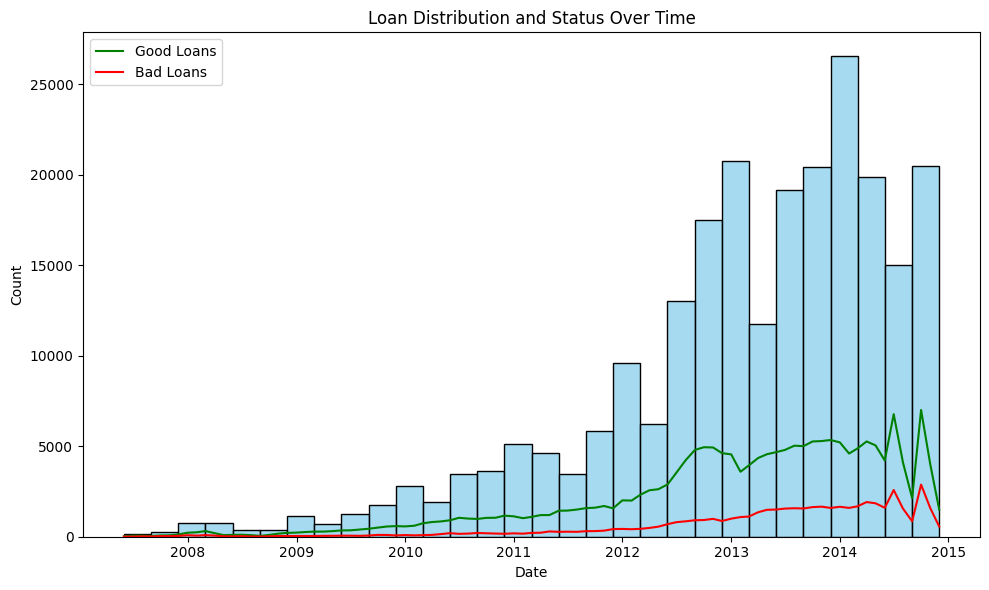

In [7]:
# Plotting
plt.figure(figsize=(10, 6))

# Histogram with loan distribution over time
sns.histplot(data=df, x='issue_d', bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Date')
plt.ylabel('Count', color='skyblue')
plt.title('Loan Distribution and Status Over Time')

# Line plot for good loans
good_loans = df[df['loan_status'] == 1].groupby('issue_d').size().reset_index(name='Count')
sns.lineplot(data=good_loans, x='issue_d', y='Count', color='green', label='Good Loans')

# Line plot for bad loans
bad_loans = df[df['loan_status'] == 0].groupby('issue_d').size().reset_index(name='Count')
sns.lineplot(data=bad_loans, x='issue_d', y='Count', color='red', label='Bad Loans')

 
#plt.axvline(pd.to_datetime('2013-07-01'), color='gray', linestyle='--', linewidth=1)


plt.ylabel('Count', color='black')
plt.legend()
plt.tight_layout()
plt.show()

## Filter issue date to determine sample window

In [9]:
train_start_date = '2010-01-01'
train_end_date = '2013-06-30'
test_start_date = '2013-07-01'
test_end_date = '2013-12-31'

In [10]:
# Split the data into (training data) and (test data)
train = df[(df['issue_d'] >= train_start_date) & (df['issue_d'] <= train_end_date)]
test = df[(df['issue_d'] >= test_start_date) & (df['issue_d'] <= test_end_date)]


print("(Training Data) Size:", len(train))
print("(Test Data) Size:", len(test))

(Training Data) Size: 115312
(Test Data) Size: 40312


In [11]:
train['loan_status'].value_counts()

loan_status
1    94381
0    20931
Name: count, dtype: int64

In [14]:
test['loan_status'].value_counts()

loan_status
1    30733
0     9579
Name: count, dtype: int64

In [12]:
train.drop(['issue_d'],inplace=True,axis=1)

In [13]:
X_train=train.drop('loan_status',axis=1)
y_train=train['loan_status']
X_test=test.drop('loan_status',axis=1)
y_test=test['loan_status']

# 1. Binning
Perform initial grouping of the variables, and rank order them by IV or some other strength measure.

In [12]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history_tenure_years,credit_history_tenure_months,earliest_cr_line_month,credit_pull_months,loan_to_income_ratio
0,5000,36 months,10.65,162.87,B2,10.0,RENT,24000.0,Verified,2011-12-01,1,credit_card,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5000.00,861.07,0.00,0.00,0.00,0.0,0.0,-9999.0,-9999.0,-9999.0,26.913073,323,1.0,-49,0.208333
1,2500,60 months,15.27,59.83,C4,0.0,RENT,30000.0,Source Verified,2011-12-01,0,car,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,456.46,435.17,0.00,117.08,1.11,0.0,0.0,-9999.0,-9999.0,-9999.0,12.668036,152,4.0,-21,0.083333
2,2400,36 months,15.96,84.33,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,1,small_business,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,2400.00,603.65,0.00,0.00,0.00,0.0,0.0,-9999.0,-9999.0,-9999.0,10.080767,121,11.0,-49,0.195886
3,10000,36 months,13.49,339.31,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,1,other,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,10000.00,2209.33,16.97,0.00,0.00,0.0,0.0,-9999.0,-9999.0,-9999.0,15.830253,190,2.0,-37,0.203252
5,5000,36 months,7.90,156.46,A4,3.0,RENT,36000.0,Source Verified,2011-12-01,1,wedding,11.20,0.0,3.0,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5000.00,631.38,0.00,0.00,0.00,0.0,0.0,-9999.0,-9999.0,-9999.0,7.080082,85,11.0,-45,0.138889


In [14]:
#specify binning requirements
combiner = toad.transform.Combiner()
combiner.fit(X_train, y_train,   method='chi', min_samples = 0.05)

bins = combiner.export()

#apply binning on both the train and test datasets
X_train = combiner.transform(X_train)
X_test = combiner.transform(X_test[X_train.columns])

In [16]:
bins

{'loan_amnt': [6000, 7025, 11900, 15025, 20000, 21025],
 'term': [[' 60 months'], [' 36 months']],
 'int_rate': [7.9, 11.49, 13.99, 15.8, 18.78],
 'installment': [281.74, 337.85, 365.23, 414.43, 510.32, 608.6],
 'sub_grade': [['G1',
   'F5',
   'F4',
   'F3',
   'G3',
   'F1',
   'G2',
   'E5',
   'G5',
   'F2',
   'E4',
   'E2',
   'E3'],
  ['G4', 'E1', 'D5', 'D4'],
  ['D3', 'D2', 'C5', 'D1', 'C4', 'C3'],
  ['C2', 'C1'],
  ['B5', 'B4'],
  ['B3', 'B2', 'B1'],
  ['A5', 'A4', 'A3'],
  ['A2', 'A1']],
 'emp_length': [1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0],
 'home_ownership': [['OTHER', 'RENT', 'OWN', 'NONE'], ['MORTGAGE']],
 'annual_inc': [41775.0, 60981.0, 80256.0, 90474.0, 125000.32],
 'verification_status': [['Verified'], ['Source Verified'], ['Not Verified']],
 'purpose': [['small_business', 'educational', 'renewable_energy', 'other'],
  ['debt_consolidation', 'moving', 'medical', 'vacation', 'house'],
  ['home_improvement', 'credit_card'],
  ['wedding', 'major_purchase', 'car']],
 '

In [17]:
X_train.drop(['total_rec_late_fee','out_prncp','out_prncp_inv','collection_recovery_fee','collections_12_mths_ex_med','acc_now_delinq'],axis=1,inplace=True)
X_test.drop(['total_rec_late_fee','out_prncp','out_prncp_inv','collection_recovery_fee','collections_12_mths_ex_med','acc_now_delinq'],axis=1,inplace=True)

# 2. WOE Calculation

WOE and IV enable one to:

Consider each variable’s independent contribution to the outcome.

Detect linear and non-linear relationships.

Rank variables in terms of “univariate” predictive strength.

Visualize the correlations between the predictive variables and the binary outcome.

Seamlessly compare the strength of continuous and categorical variables without creating dummy variables.

Seamlessly handle missing values without imputation.

Assess the predictive power of missing values.

In [18]:
t=toad.transform.WOETransformer()
#transform training set
train_woe = t.fit_transform(X=X_train,
                            y=y_train)
#transform testing set
test_woe = t.transform(X_test[X_train.columns]) 


In [19]:
train_woe

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_rec_prncp,total_rec_int,recoveries,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history_tenure_years,credit_history_tenure_months,earliest_cr_line_month,credit_pull_months,loan_to_income_ratio
0,0.167812,0.262746,0.612899,0.205810,0.441856,-0.083688,-0.076853,-0.213719,-0.233911,0.211502,-0.458569,0.013837,-0.061387,0.078200,0.015767,-0.039715,-0.190382,-0.028743,0.016348,-0.118264,-0.688517,0.0,1.109130,0.122622,0.117065,0.122622,0.085229,0.061479,-0.039811,0.294152,0.029728
1,0.167812,-0.817616,-0.067643,0.205810,-0.387916,0.064949,-0.076853,-0.213719,0.017870,0.437290,0.350999,0.013837,-0.350717,0.078200,0.015767,0.159286,0.559985,-0.028743,0.016348,-1.207886,-2.230541,0.0,-11.054848,0.122622,0.117065,0.122622,-0.031661,-0.039558,-0.077572,-0.720113,0.364682
2,0.167812,0.262746,-0.475492,0.205810,-0.387916,-0.083688,-0.076853,-0.213719,0.280233,-0.313516,0.350999,0.013837,-0.183030,0.078200,0.015767,0.159286,-0.394447,-0.028743,0.016348,-1.207886,-2.230541,0.0,1.109130,0.122622,0.117065,0.122622,-0.031661,-0.039558,0.069944,0.294152,0.230004
3,0.082811,0.262746,0.194628,-0.170182,-0.025519,-0.083688,-0.076853,-0.114817,0.017870,-0.313516,-0.121464,0.013837,-0.061387,-0.035602,0.015767,-0.039715,0.559985,0.047310,0.016348,0.538166,1.248130,0.0,1.109130,0.122622,0.117065,0.122622,-0.031661,0.061479,-0.042214,1.356364,0.029728
5,0.167812,0.262746,0.612899,0.205810,0.975254,0.033078,-0.076853,-0.213719,0.017870,0.437290,0.163850,0.013837,-0.350717,0.030379,0.015767,-0.039715,0.167755,-0.028743,0.016348,-0.118264,-0.688517,0.0,1.109130,0.122622,0.117065,0.122622,-0.031661,-0.039558,0.069944,0.294152,0.364682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230651,0.159707,0.262746,0.612899,0.107962,0.975254,0.033078,0.088927,-0.114817,0.280233,0.211502,0.163850,0.013837,0.176320,0.030379,0.015767,-0.039715,-0.006450,-0.028743,0.016348,0.538166,1.248130,0.0,1.109130,0.122622,0.117065,0.122622,-0.031661,-0.039558,-0.077572,-0.122759,-0.274975
230652,-0.070383,0.262746,-0.475492,-0.146946,-0.387916,-0.075985,-0.076853,-0.114817,0.017870,-0.071659,-0.028254,-0.088642,-0.350717,-0.035602,0.015767,-0.039715,-0.006450,-0.028743,0.016348,1.440692,2.420370,0.0,1.109130,0.122622,0.117065,0.122622,0.085229,0.061479,0.073689,0.294152,-0.458446
230653,0.159707,0.262746,-0.067643,-0.324334,-0.387916,0.033078,-0.076853,-0.114817,0.017870,-0.313516,0.350999,-0.088642,-0.061387,-0.118948,0.015767,-0.039715,0.167755,0.047310,0.016348,0.538166,2.420370,0.0,1.109130,0.122622,0.117065,0.122622,-0.031661,-0.039558,-0.039811,-0.122759,0.029728
230654,-0.365526,0.262746,-0.475492,-0.146946,-0.387916,0.033078,0.088927,0.425359,0.017870,-0.313516,0.350999,0.013837,-0.061387,0.030379,0.015767,-0.021538,-0.006450,-0.028743,0.016348,1.440692,2.420370,0.0,1.109130,0.122622,0.117065,0.122622,-0.031661,-0.039558,0.017116,-0.122759,0.029728


In [20]:
test_woe

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_pymnt,total_rec_prncp,total_rec_int,recoveries,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history_tenure_years,credit_history_tenure_months,earliest_cr_line_month,credit_pull_months,loan_to_income_ratio
42538,0.159707,0.262746,0.194628,0.107962,0.154036,-0.083688,-0.076853,-0.213719,0.017870,-0.071659,-0.028254,0.013837,0.176320,0.078200,-0.223443,-0.039715,-0.190382,0.047310,-0.123473,0.538166,1.248130,0.0,1.109130,-0.116387,-0.252149,-0.193606,-0.031661,0.061479,0.073689,-0.122759,-0.274975
42544,0.167812,0.262746,0.194628,0.205810,0.154036,-0.083688,-0.076853,-0.213719,-0.233911,-0.071659,-0.233197,0.013837,0.176320,0.078200,-0.223443,0.159286,-0.006450,0.047310,0.016348,-1.207886,-0.688517,0.0,1.109130,-0.116387,-0.252149,-0.193606,0.085229,0.061479,-0.031915,-0.122759,0.364682
42546,-0.365526,0.262746,1.379417,-0.146946,0.975254,0.050329,0.088927,0.425359,0.017870,-0.071659,-0.121464,0.013837,-0.061387,-0.035602,0.015767,-0.021538,-0.006450,0.047310,-0.123473,1.440692,2.420370,0.0,1.109130,-0.116387,0.152548,0.040918,0.085229,0.061479,0.069944,-0.720113,0.364682
42549,-0.365526,0.262746,0.194628,-0.146946,0.154036,-0.083688,0.088927,0.316796,-0.233911,0.211502,-0.233197,0.013837,0.176320,-0.035602,0.015767,-0.021538,-0.190382,0.047310,-0.123473,1.440692,2.420370,0.0,1.109130,-0.116387,-0.132278,-0.193606,0.085229,0.061479,-0.039811,-0.720113,0.029728
42550,0.082811,0.262746,0.612899,0.205810,0.441856,0.094579,0.088927,-0.213719,0.280233,-0.071659,0.074595,0.013837,-0.061387,0.030379,-0.223443,-0.039715,0.167755,-0.028743,0.016348,-1.207886,-0.688517,0.0,1.109130,-0.116387,-0.252149,-0.193606,0.085229,0.061479,-0.006326,-0.122759,0.029728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129842,-0.070383,0.262746,1.379417,-0.146946,1.574181,0.094579,0.088927,0.316796,0.017870,-0.071659,0.074595,0.013837,0.176320,-0.035602,0.015767,-0.021538,0.167755,0.047310,-0.123473,1.440692,2.420370,0.0,1.109130,-0.116387,0.152548,0.040918,-0.031661,-0.039558,-0.000200,-0.720113,0.230004
129985,-0.307678,-0.817616,-0.475492,0.107962,-0.387916,-0.083688,-0.076853,-0.114817,0.017870,-0.071659,0.163850,0.013837,-0.061387,0.030379,0.015767,-0.039715,-0.190382,-0.028743,0.016348,0.538166,2.420370,0.0,1.109130,-0.116387,-0.252149,-0.193606,-0.031661,0.061479,-0.051872,-0.720113,-0.274975
130534,0.159707,0.262746,0.194628,-0.156384,0.154036,0.064949,-0.076853,0.316796,0.017870,-0.071659,0.074595,0.013837,-0.061387,-0.035602,0.015767,-0.021538,-0.190382,0.047310,-0.123473,0.538166,2.420370,0.0,1.109130,-0.116387,0.152548,0.040918,-0.031661,-0.039558,-0.077572,-0.122759,0.364682
131116,0.082811,0.262746,0.194628,0.205810,0.154036,0.094967,-0.076853,-0.213719,0.280233,-0.071659,-0.458569,0.013837,0.176320,0.078200,0.015767,-0.039715,-0.190382,-0.028743,0.016348,-1.207886,-2.230541,0.0,-11.054848,-0.116387,-0.252149,-0.193606,-0.031661,-0.039558,-0.006326,-0.720113,-0.274975


## 3.IV Selection

In [21]:
quality=toad.quality(train_woe, target=y_train,iv_only=False)
quality

,iv,gini,entropy,unique
recoveries,8.151625,0.111582,0.218591,2.0
total_rec_prncp,1.939288,0.213388,0.345273,5.0
total_pymnt,0.673546,0.266273,0.425055,4.0
int_rate,0.414945,0.279477,0.444195,6.0
sub_grade,0.409553,0.279868,0.444686,8.0
credit_pull_months,0.367274,0.282772,0.448347,4.0
term,0.211079,0.286182,0.457324,2.0
loan_to_income_ratio,0.147644,0.290104,0.462533,7.0
revol_util,0.067759,0.294320,0.468782,5.0
dti,0.056540,0.294602,0.469479,7.0


## Monoticity

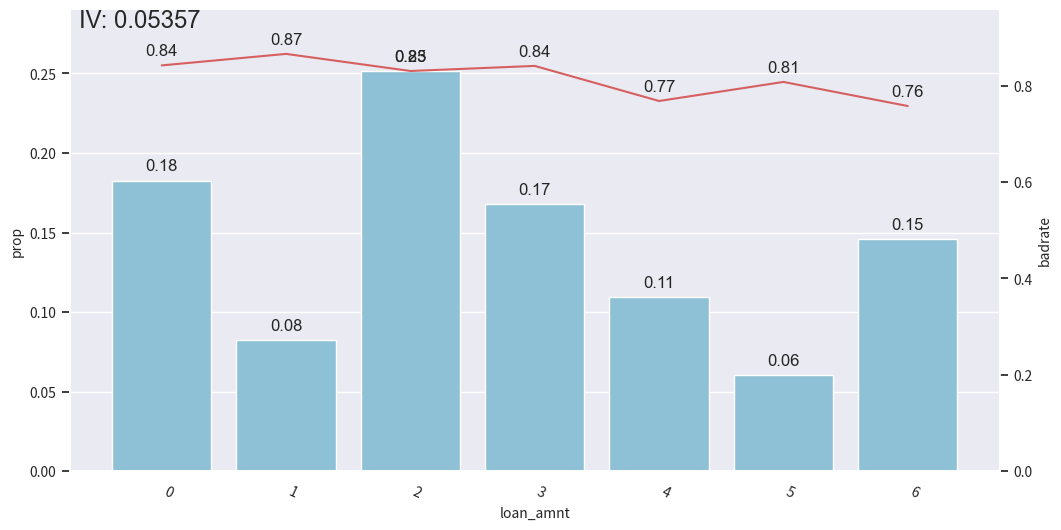

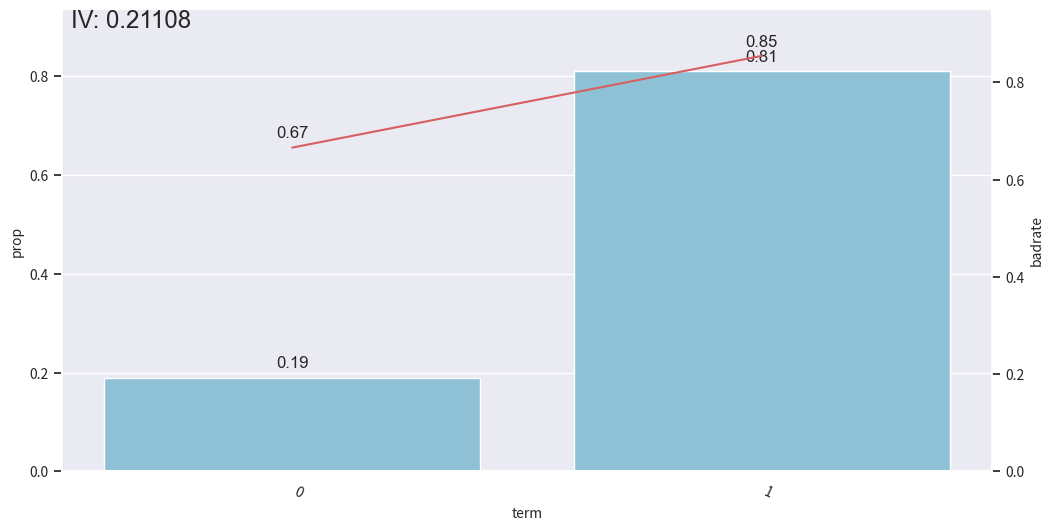

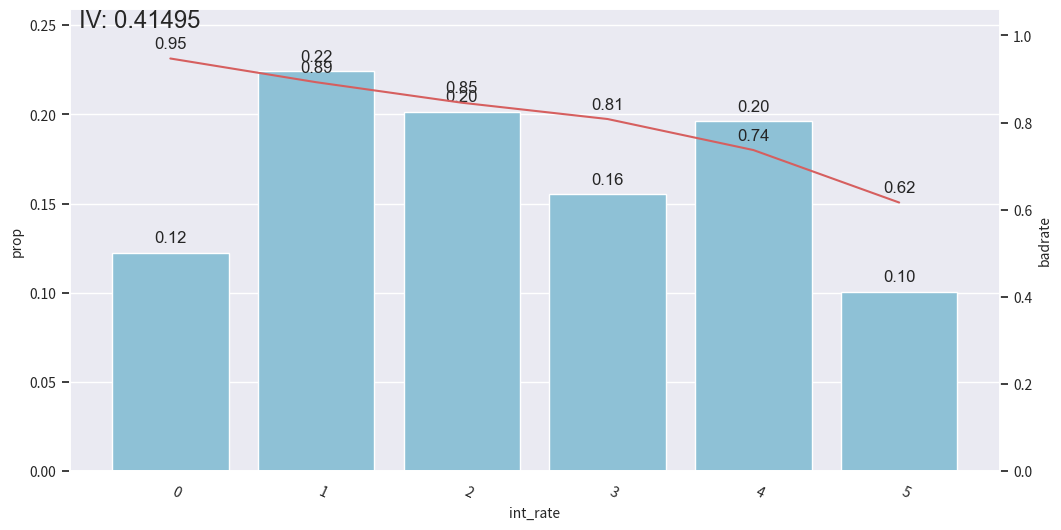

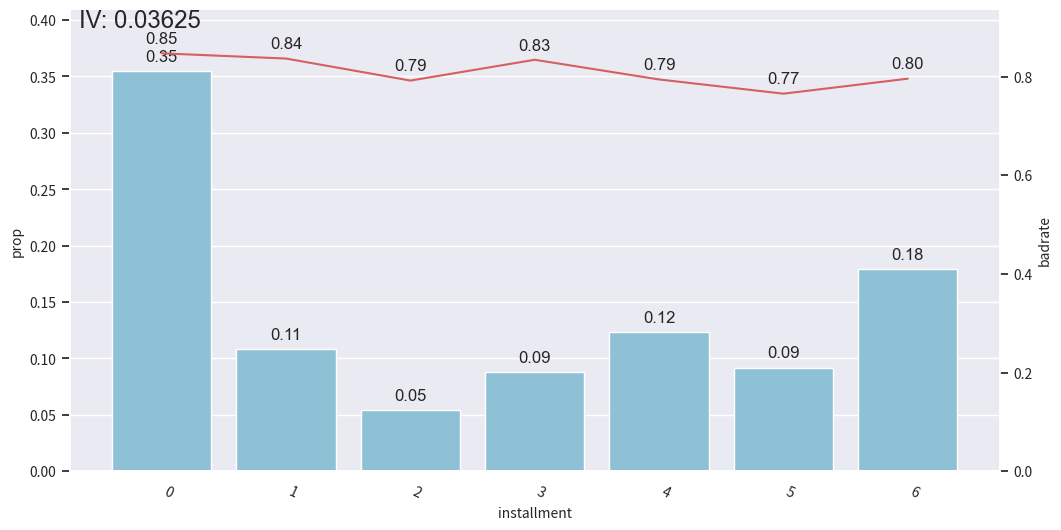

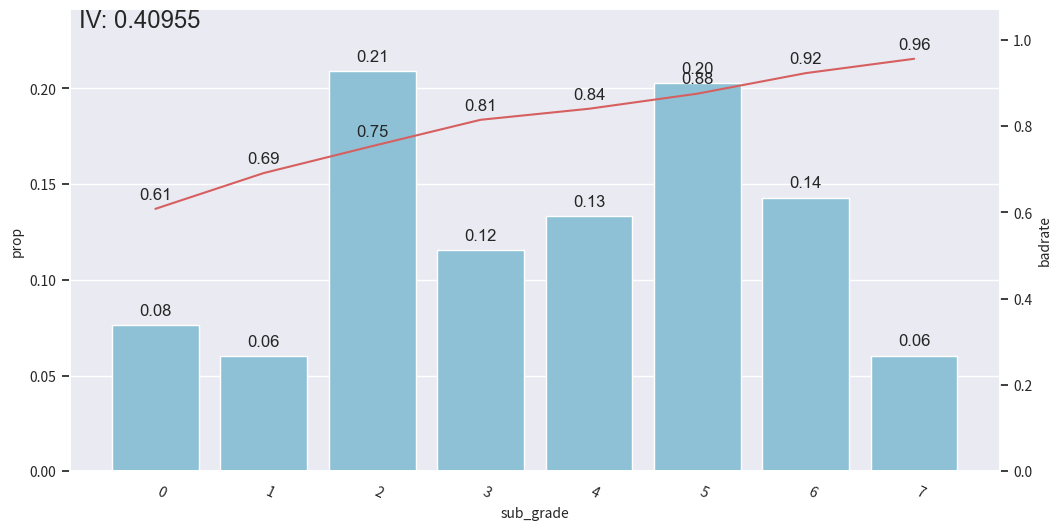

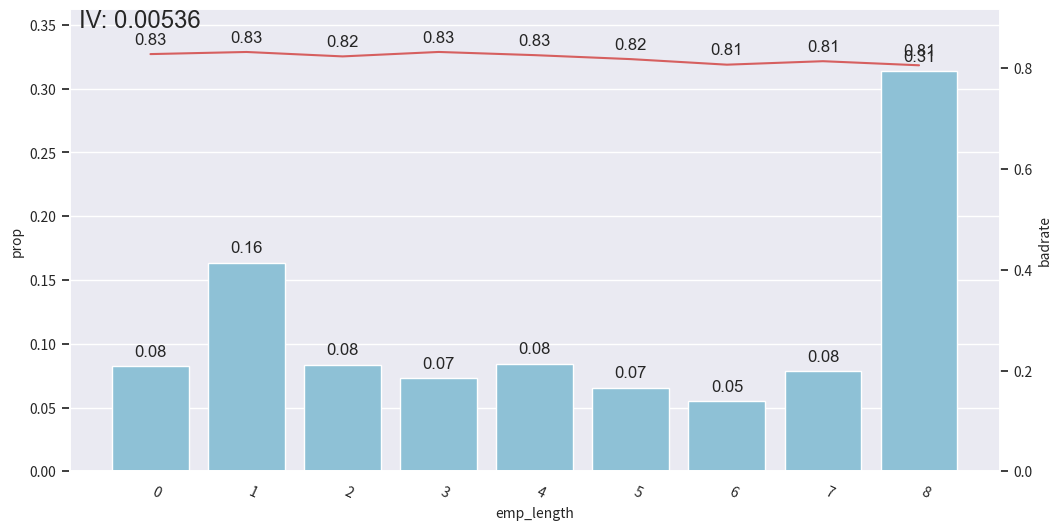

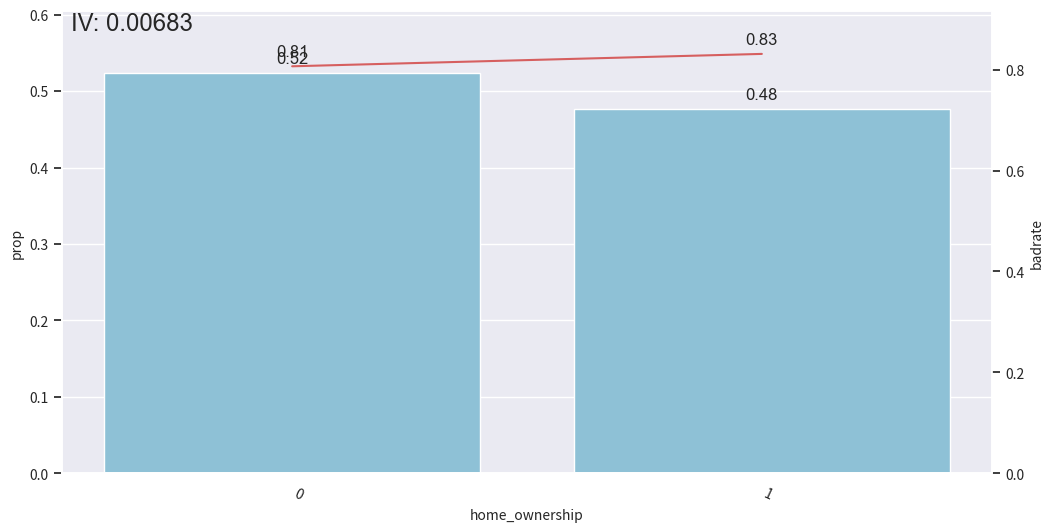

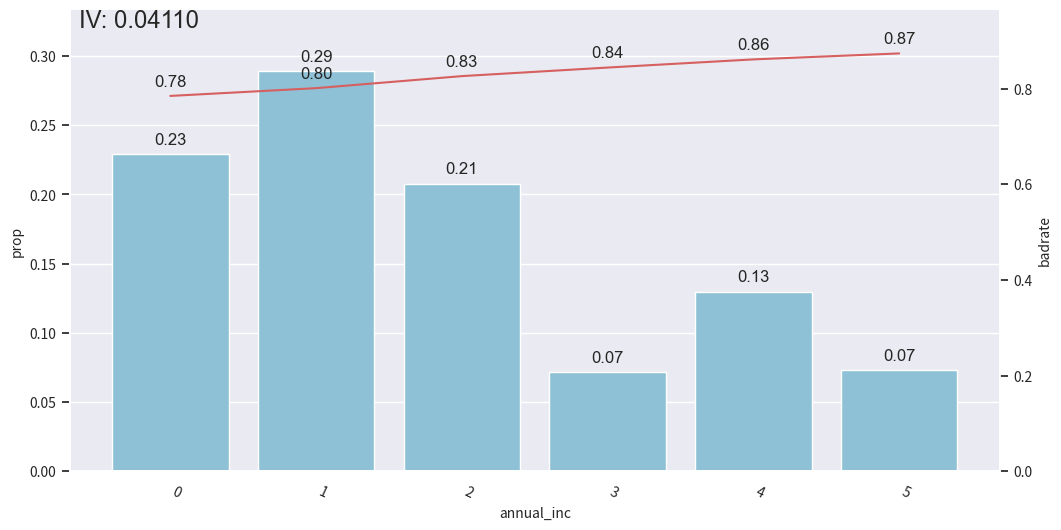

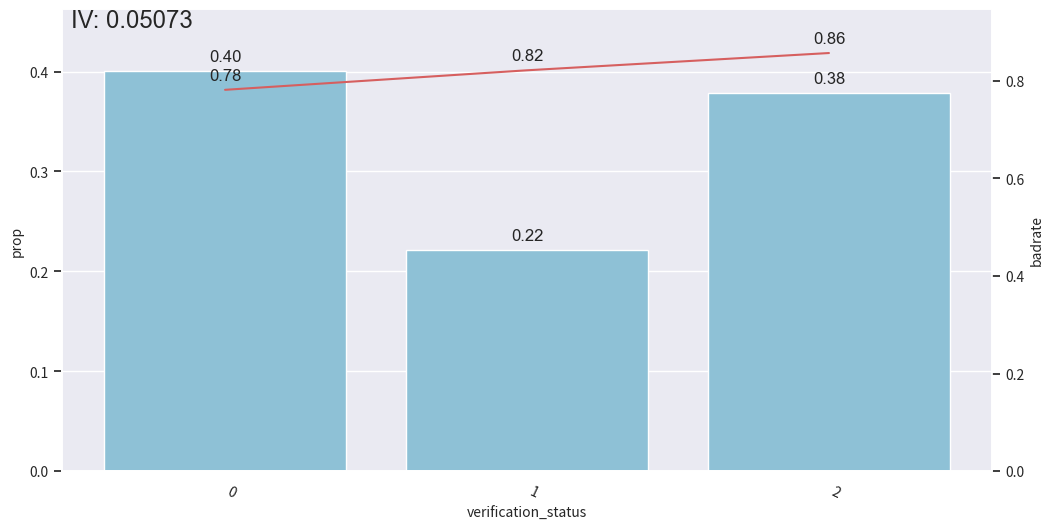

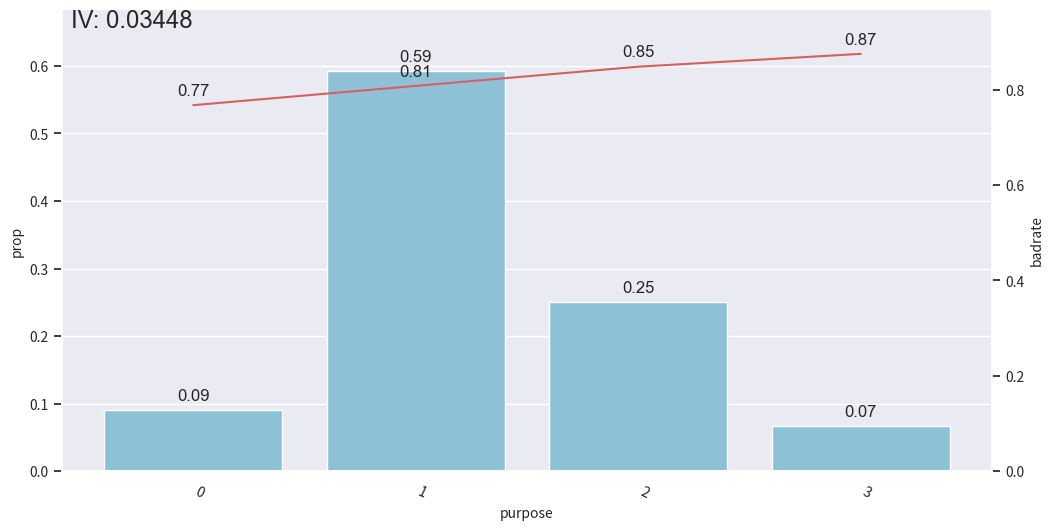

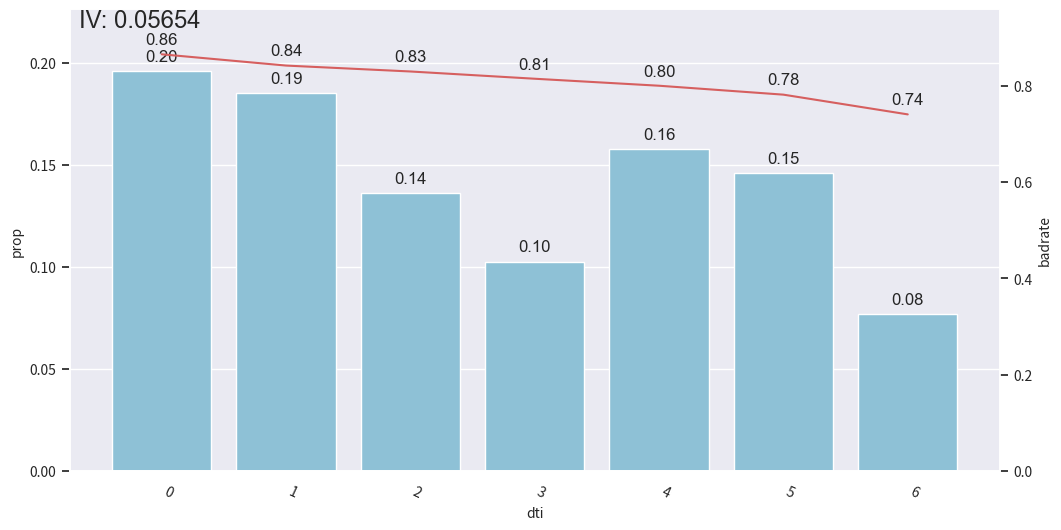

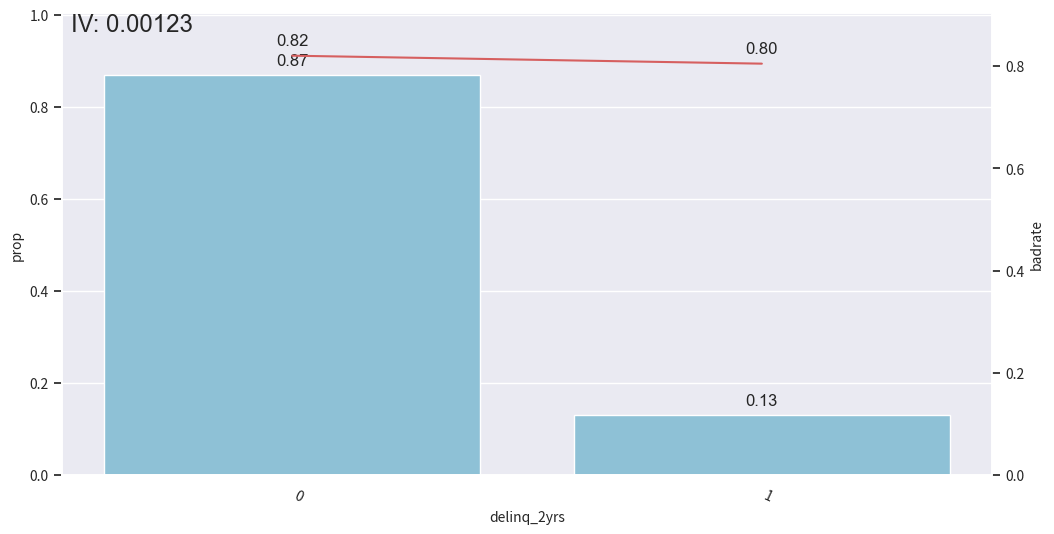

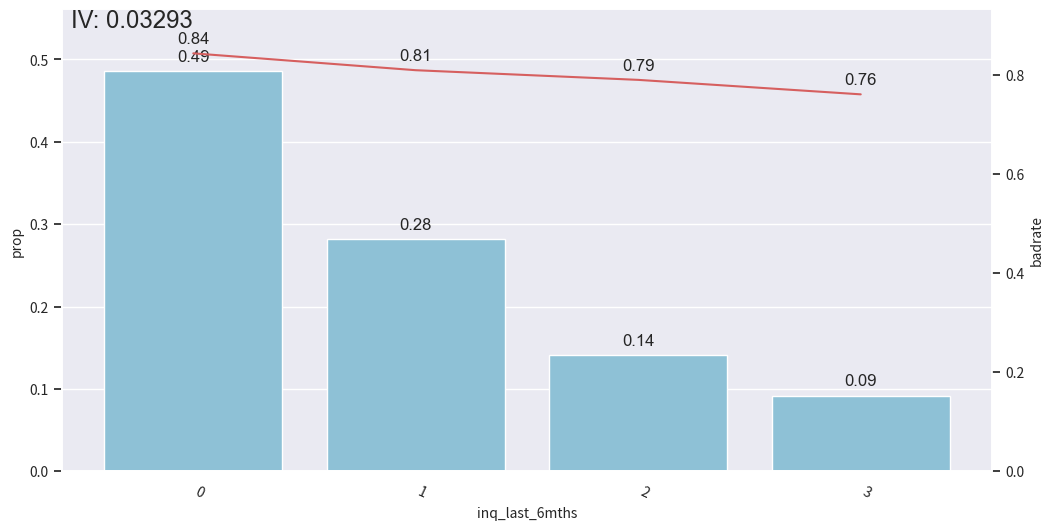

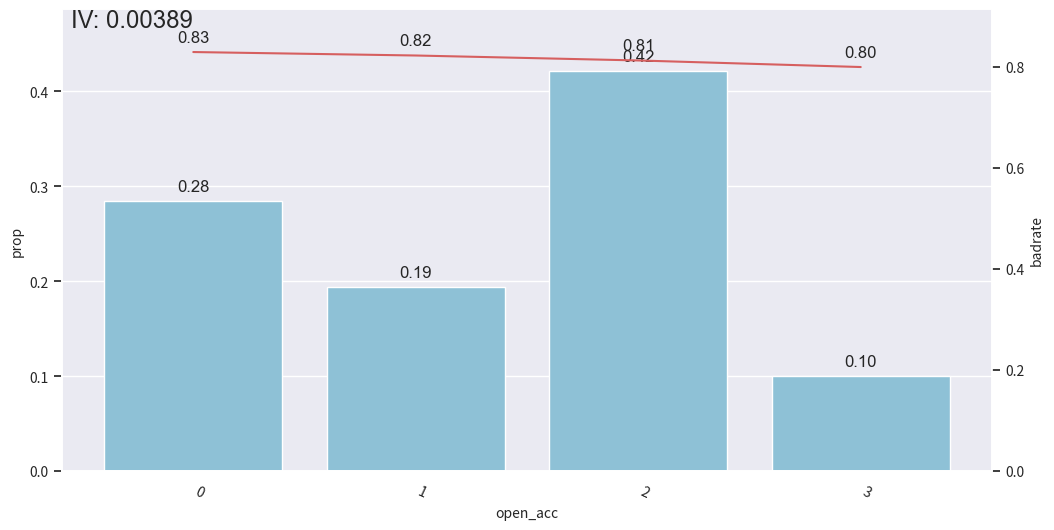

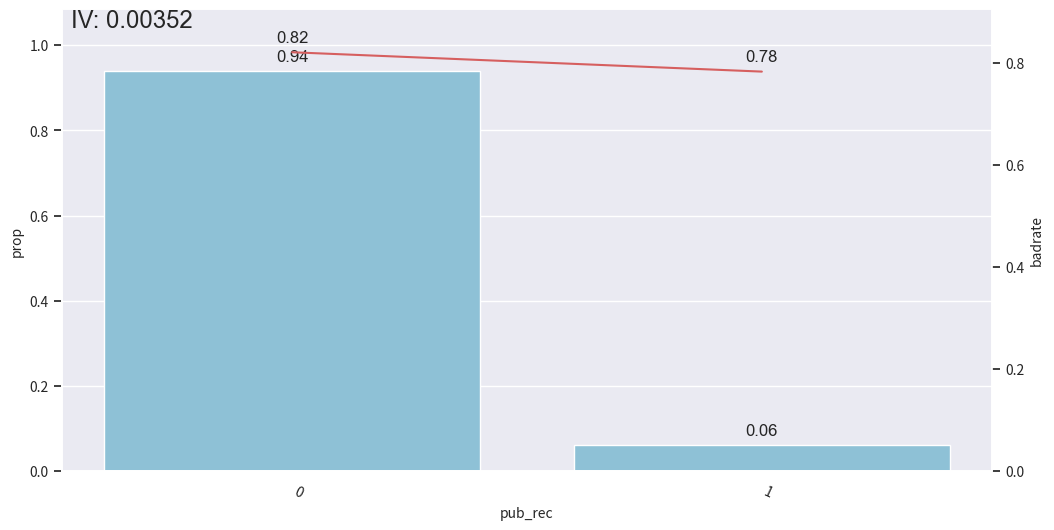

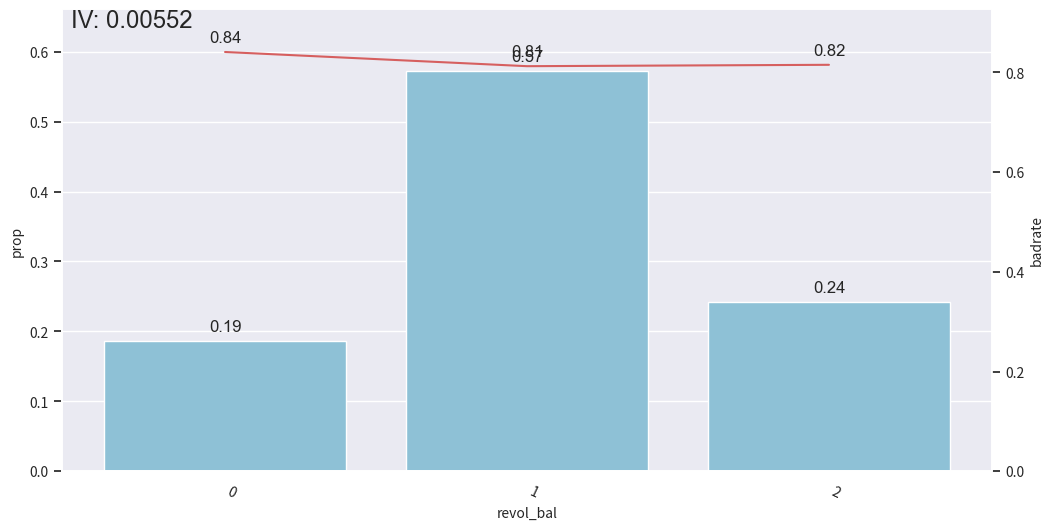

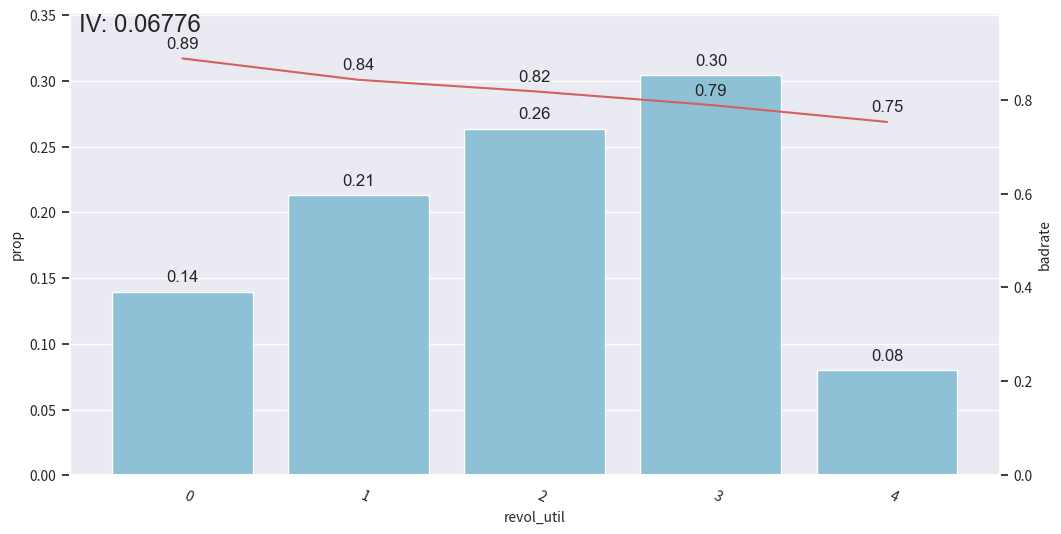

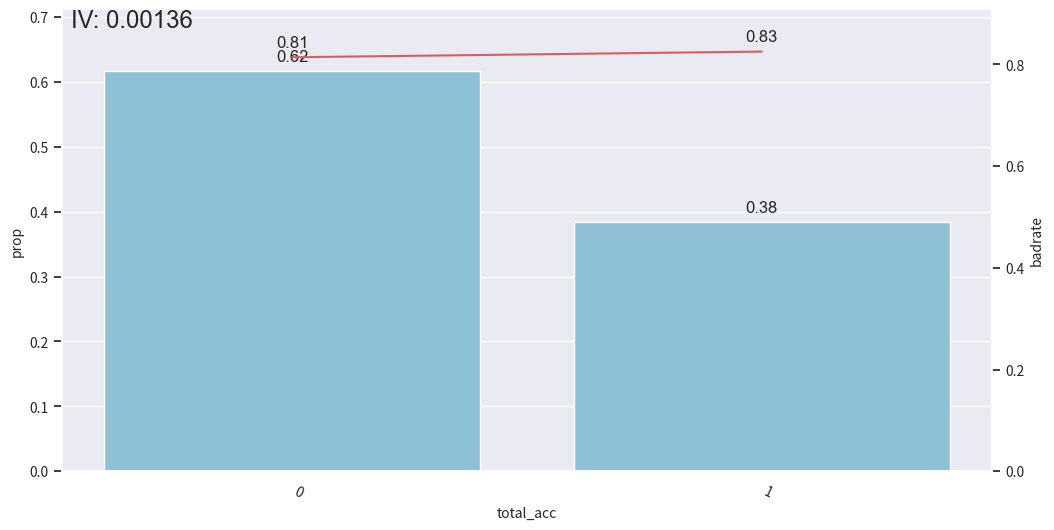

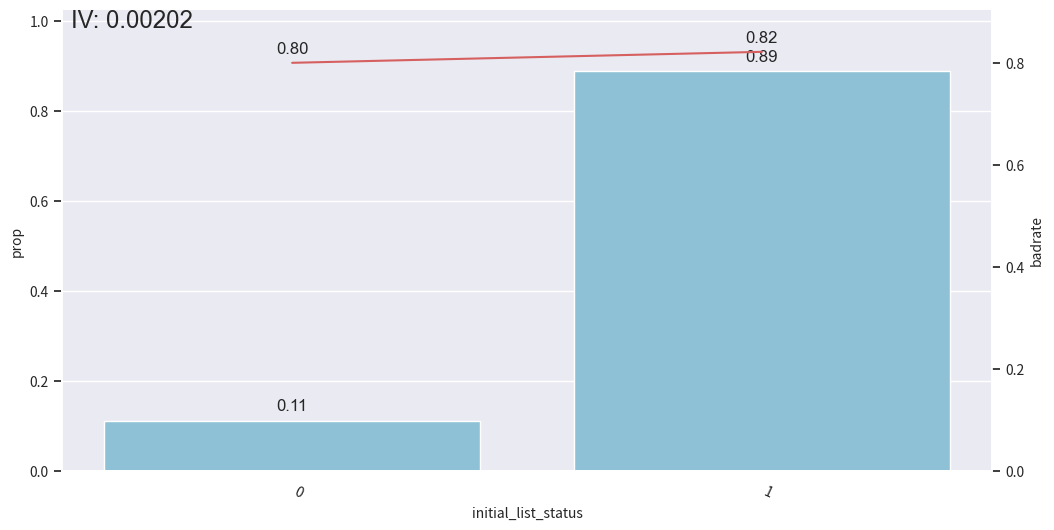

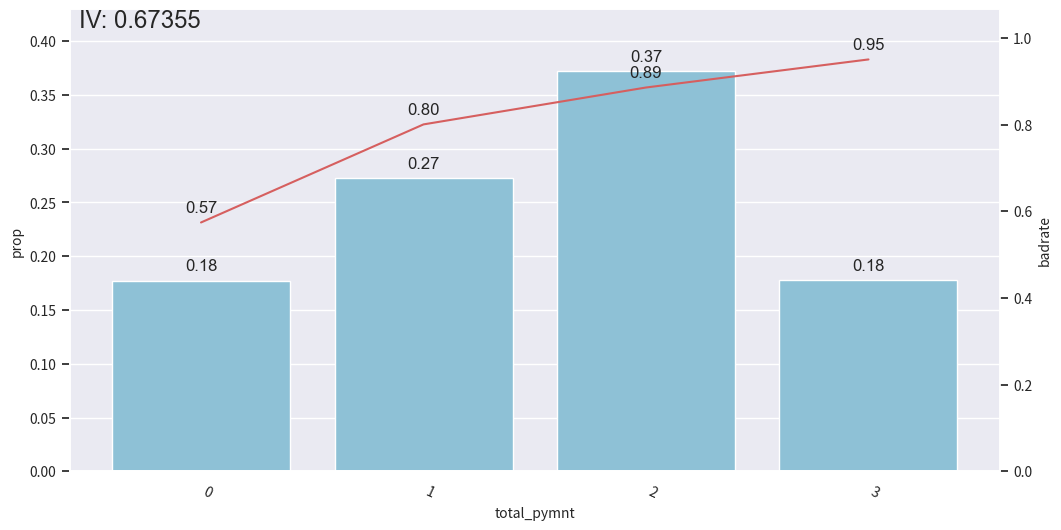

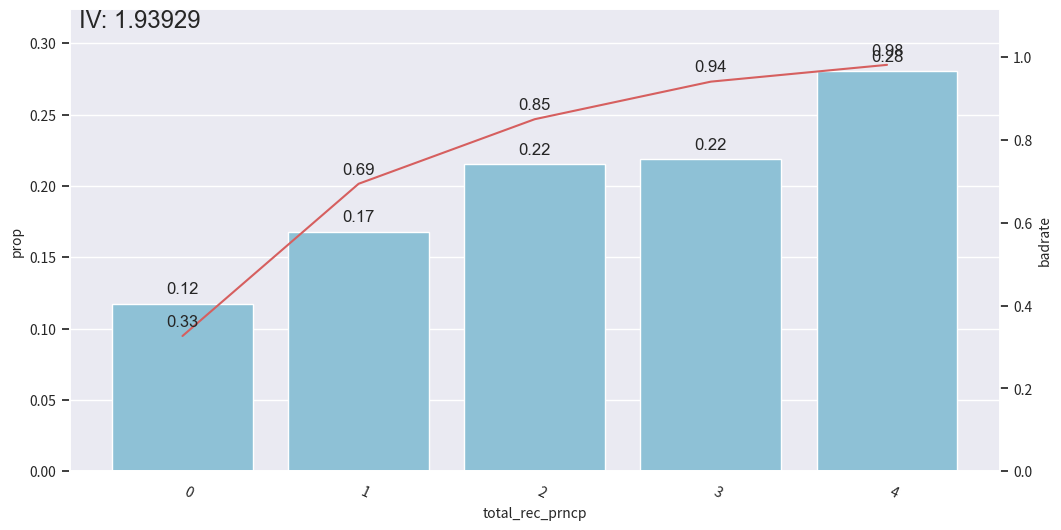

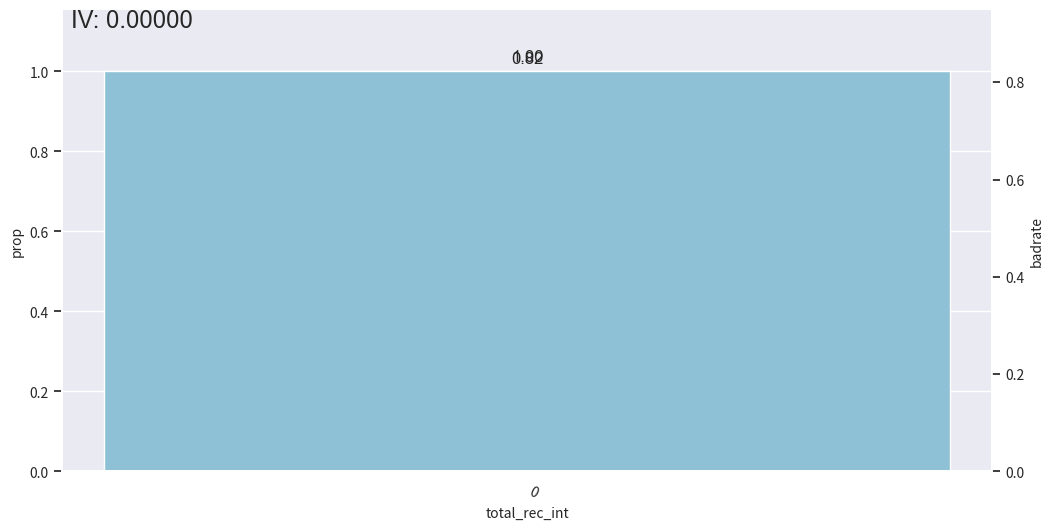

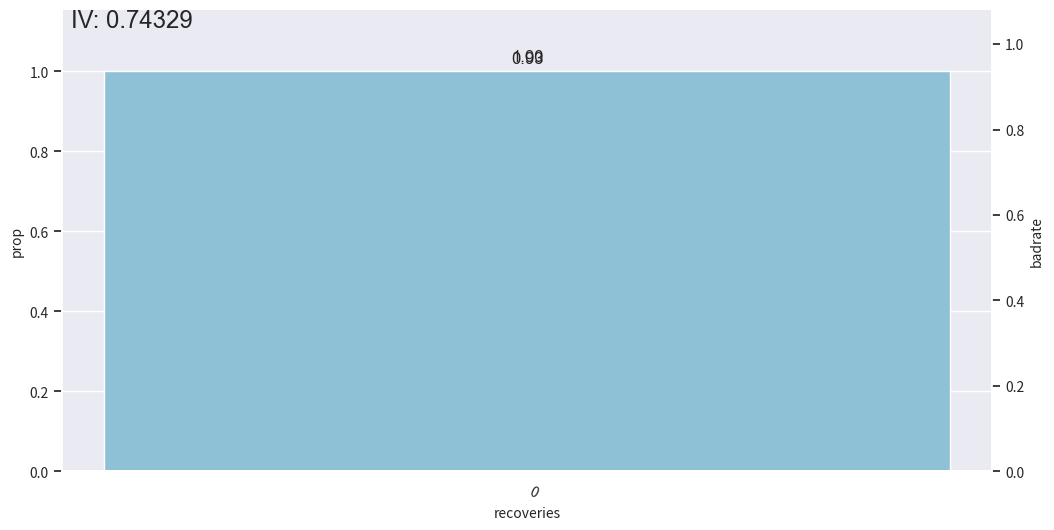

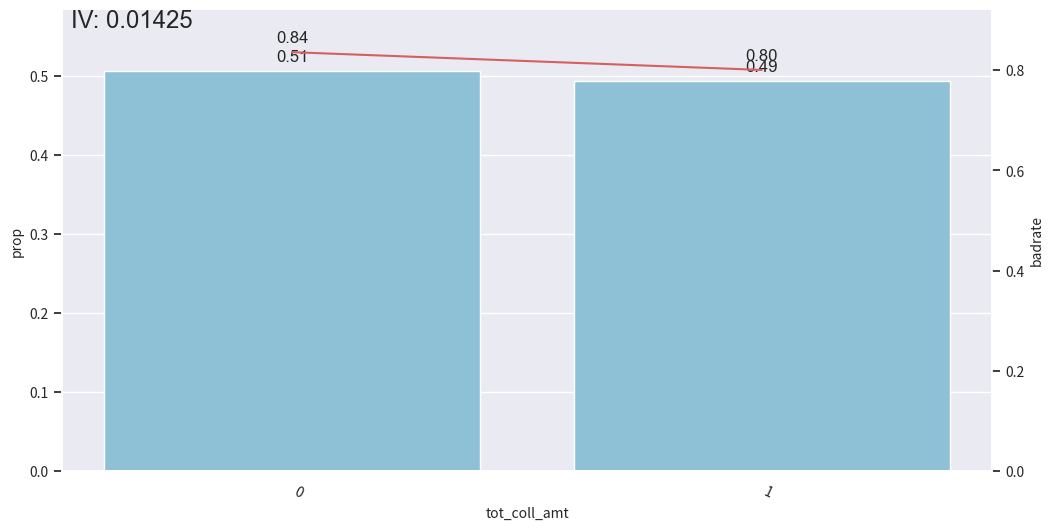

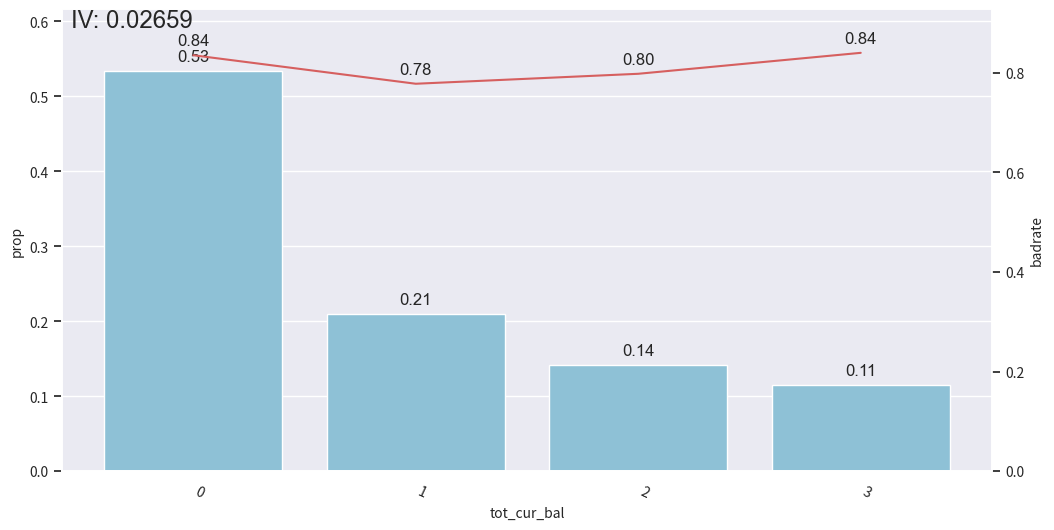

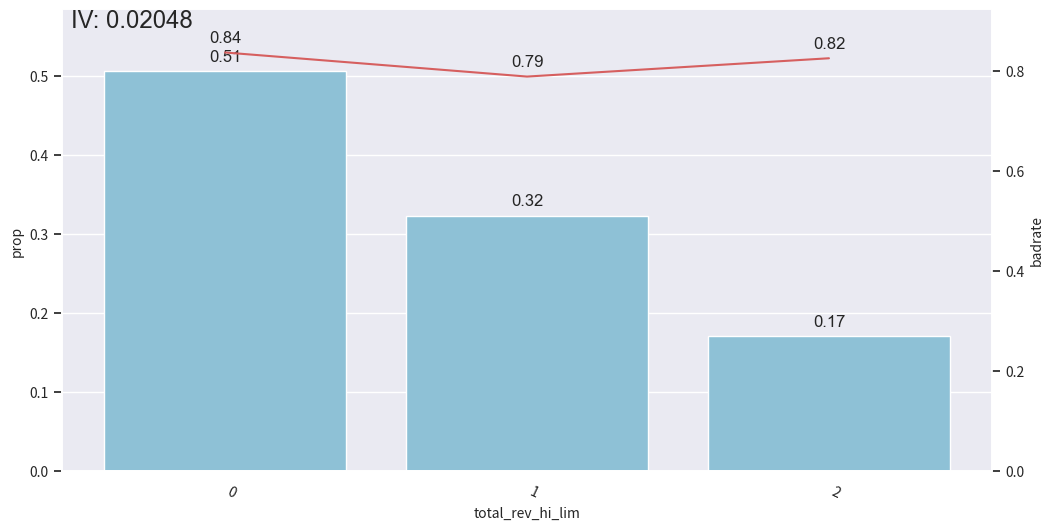

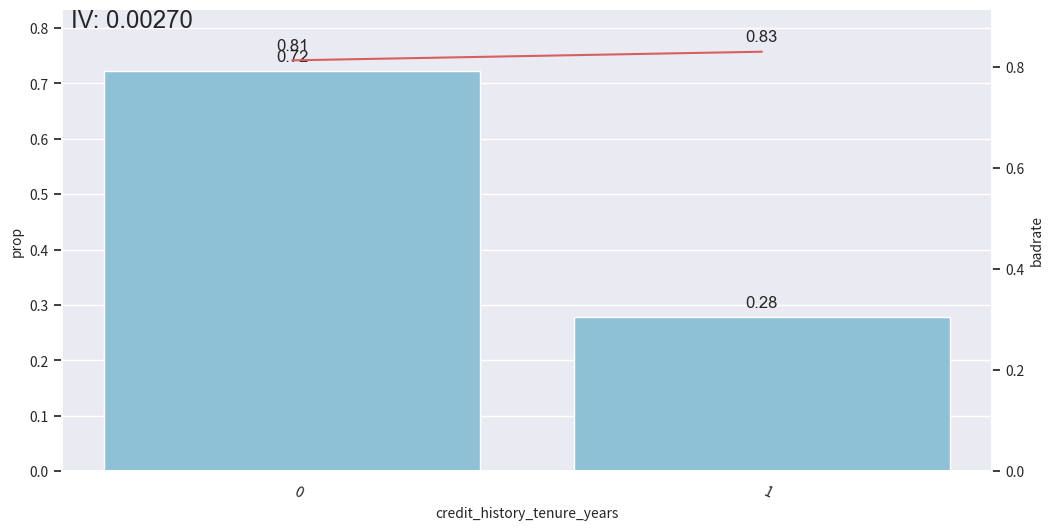

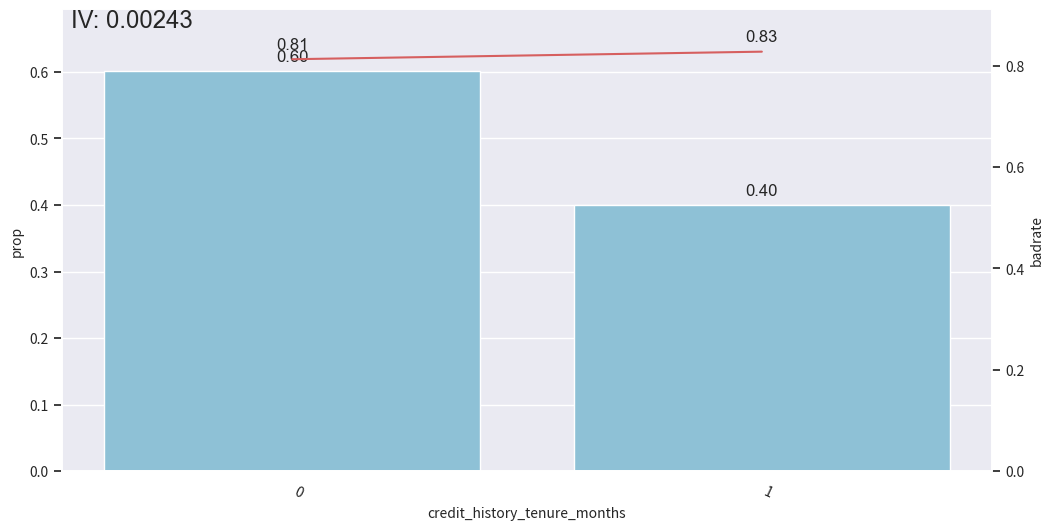

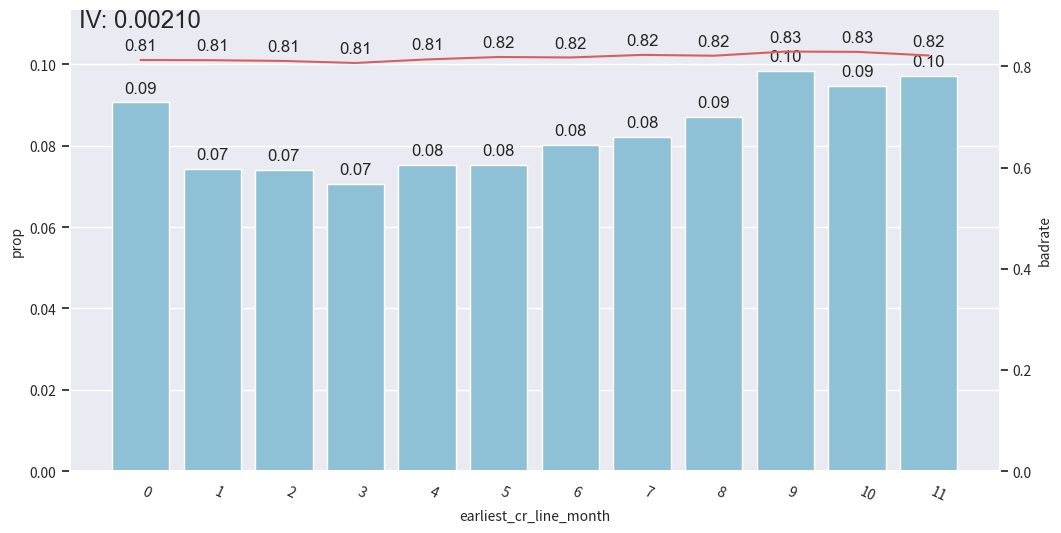

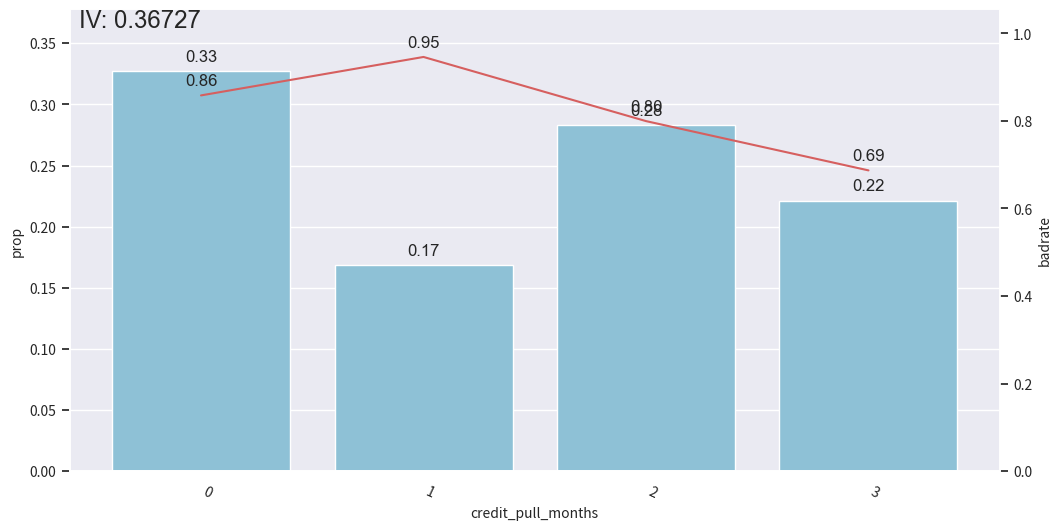

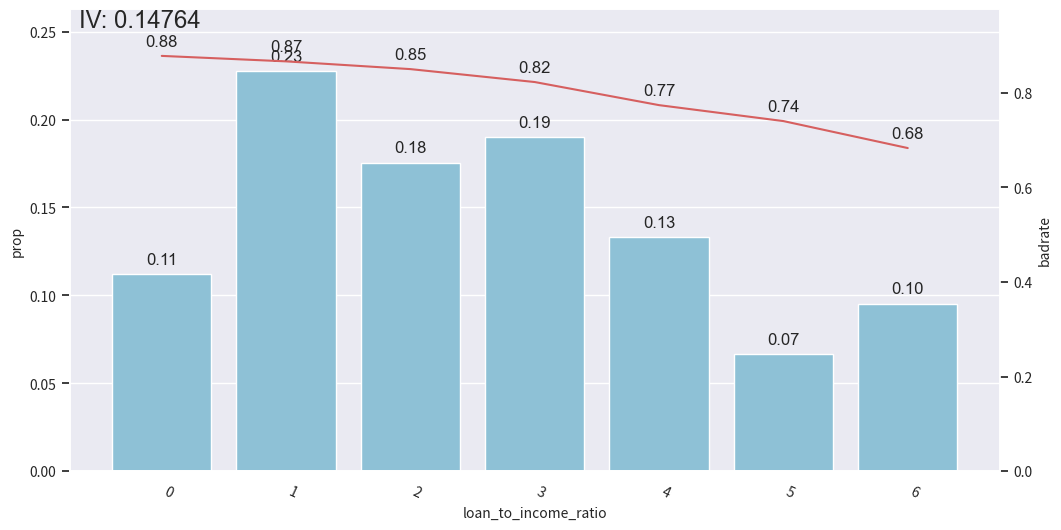

In [20]:
from toad.plot import  bin_plot
for col in X_train.columns:
    if col != 'loan_status':
        toad.plot.bin_plot(X_train, x=col, target=y_train)
       

In [22]:
quality.reset_index(inplace=True)
quality.rename(columns={'index': 'Feature'}, inplace=True)

In [23]:
quality

,Feature,iv,gini,entropy,unique
0,recoveries,8.151625,0.111582,0.218591,2.0
1,total_rec_prncp,1.939288,0.213388,0.345273,5.0
2,total_pymnt,0.673546,0.266273,0.425055,4.0
3,int_rate,0.414945,0.279477,0.444195,6.0
4,sub_grade,0.409553,0.279868,0.444686,8.0
5,credit_pull_months,0.367274,0.282772,0.448347,4.0
6,term,0.211079,0.286182,0.457324,2.0
7,loan_to_income_ratio,0.147644,0.290104,0.462533,7.0
8,revol_util,0.067759,0.294320,0.468782,5.0
9,dti,0.056540,0.294602,0.469479,7.0


In [24]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(X):
    
    if 'const' not in X.columns:
        X_with_const = add_constant(X)
    else:
        X_with_const = X.copy()  # Create a copy to avoid modifying the original DataFrame
    
    vif_values = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
    return pd.DataFrame({'Feature': X_with_const.columns, 'VIF': vif_values})

# Assuming X_train is your DataFrame containing predictor variables
vif_df = calculate_vif(train_woe)
vif_df


,Feature,VIF
0,const,1.768792
1,loan_amnt,2.664622
2,term,1.599268
3,int_rate,9.747254
4,installment,2.682098
5,sub_grade,9.788745
6,emp_length,1.103870
7,home_ownership,1.289353
8,annual_inc,2.688552
9,verification_status,1.301591


In [26]:
combined=pd.merge(quality, vif_df, on='Feature')
combined.sort_values(by='iv', ascending=True)

,Feature,iv,gini,entropy,unique,VIF
30,total_rec_int,0.000000,0.297136,0.473685,1.0,NaN
29,delinq_2yrs,0.001226,0.297081,0.473593,2.0,1.072434
28,total_acc,0.001360,0.297077,0.473584,2.0,1.511060
27,initial_list_status,0.002018,0.297044,0.473533,2.0,1.152864
26,earliest_cr_line_month,0.002103,0.297070,0.473631,12.0,1.005223
25,credit_history_tenure_months,0.002432,0.297030,0.473505,2.0,2.508986
24,credit_history_tenure_years,0.002698,0.297019,0.473486,2.0,2.399624
23,pub_rec,0.003522,0.296970,0.473418,2.0,1.042798
22,open_acc,0.003886,0.296964,0.473396,4.0,1.631634
21,emp_length,0.005360,0.296900,0.473287,9.0,1.103870


In [27]:
filtered_columns = combined[(combined['VIF'] > 10) | (combined['iv'] < 0.02) | (combined['iv'] > 0.5)]
filtered_columns['Feature'].tolist()
columns_to_drop = filtered_columns['Feature'].tolist()

In [28]:
columns_to_drop

['recoveries',
 'total_rec_prncp',
 'total_pymnt',
 'tot_coll_amt',
 'home_ownership',
 'revol_bal',
 'emp_length',
 'open_acc',
 'pub_rec',
 'credit_history_tenure_years',
 'credit_history_tenure_months',
 'earliest_cr_line_month',
 'initial_list_status',
 'total_acc',
 'delinq_2yrs',
 'total_rec_int']

In [29]:
X_train.drop(columns=columns_to_drop,inplace=True)
X_test.drop(columns=columns_to_drop,inplace=True)

In [30]:
X_train

,loan_amnt,term,int_rate,installment,sub_grade,annual_inc,verification_status,purpose,dti,inq_last_6mths,revol_util,tot_cur_bal,total_rev_hi_lim,credit_pull_months,loan_to_income_ratio
0,0,1,1,0,5,0,0,2,6,1,3,0,0,0,3
1,0,0,3,0,2,0,1,3,0,3,0,0,0,3,1
2,0,1,4,0,2,0,2,0,0,2,4,0,0,0,2
3,2,1,2,2,3,1,1,0,4,1,0,0,0,1,3
5,0,1,1,0,6,0,1,3,1,3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230651,3,1,1,3,6,1,2,2,1,0,2,0,0,2,4
230652,5,1,4,6,2,1,1,1,3,3,2,0,0,0,5
230653,3,1,3,5,2,1,1,0,0,1,1,0,0,2,3
230654,6,1,4,6,2,5,1,0,0,1,2,0,0,2,3


In [31]:
## Recompute the woe
t=toad.transform.WOETransformer()

#transform training set
train_woe = t.fit_transform(X=X_train,y=y_train)

#transform testing set
test_woe = t.transform(X_test[X_train.columns]) 


In [32]:
quality=toad.quality(train_woe, target=y_train,iv_only=False)

quality.reset_index(inplace=True)
quality.rename(columns={'index': 'Feature'}, inplace=True)


# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(X):
    # Check if the DataFrame already contains a constant column
    if 'const' not in X.columns:
        X_with_const = add_constant(X)
    else:
        X_with_const = X.copy()  
    
    vif_values = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
    return pd.DataFrame({'Feature': X_with_const.columns, 'VIF': vif_values})


vif_df = calculate_vif(train_woe)

combined=pd.merge(quality, vif_df, on='Feature')
combined.sort_values(by='iv', ascending=True)

,Feature,iv,gini,entropy,unique,VIF
14,total_rev_hi_lim,0.020475,0.296210,0.472153,3.0,1.862845
13,tot_cur_bal,0.026591,0.295923,0.471690,4.0,1.842717
12,inq_last_6mths,0.032930,0.295641,0.471220,4.0,1.128474
11,purpose,0.034480,0.295663,0.471159,4.0,1.019218
10,installment,0.036250,0.295512,0.470983,7.0,2.262125
9,annual_inc,0.041096,0.295405,0.470687,6.0,2.141369
8,verification_status,0.050733,0.294923,0.469939,3.0,1.282847
7,loan_amnt,0.053568,0.294677,0.469665,7.0,2.606735
6,dti,0.056540,0.294602,0.469479,7.0,1.198371
5,revol_util,0.067759,0.294320,0.468782,5.0,1.425044


In [33]:

psi_df = toad.metrics.PSI(train_woe, test_woe).sort_values()  
psi_df = psi_df.reset_index()  
psi_df = psi_df.rename(columns = {'index': 'feature', 0: 'psi'})
psi_df

,feature,psi
0,inq_last_6mths,0.000959
1,dti,0.015669
2,annual_inc,0.017467
3,term,0.017725
4,loan_to_income_ratio,0.018242
5,revol_util,0.026031
6,installment,0.035724
7,loan_amnt,0.035796
8,verification_status,0.047121
9,purpose,0.052796


In [34]:
#The industry level is to drop features with a PSI greater than 0.2
col_keep = list(set(list(psi_df[psi_df.psi<0.2].feature)))
train_psi = train_woe[col_keep]

print("keep:", train_psi.shape[1])

psi_df

keep: 12


,feature,psi
0,inq_last_6mths,0.000959
1,dti,0.015669
2,annual_inc,0.017467
3,term,0.017725
4,loan_to_income_ratio,0.018242
5,revol_util,0.026031
6,installment,0.035724
7,loan_amnt,0.035796
8,verification_status,0.047121
9,purpose,0.052796


In [35]:
train_psi, drop_lst = toad.selection.select(train_psi,
                                               y_train,
                                               #empty=0.7,   
                                               #iv = 0.02 ,
                                               corr=0.7, 
                                               return_drop=True, 
                                               )  
print("keep:", train_psi.shape[1],  
      "drop corr:", len(drop_lst['corr'])) 

keep: 11 drop corr: 1


## 4. Step wise regression

In [36]:
train_stp = toad.selection.stepwise(train_psi,   y_train,  
             direction='both',   criterion='aic',  estimator='ols',intercept=False)  
print("keep:", train_stp.shape[1])

## ensure the features selected also apply to the test

test_stp = test_woe[train_stp.columns]  

keep: 10


## Train ,Test split


In [37]:
# Rename the dataset to X_train,y_train, X_test,y_test
X_train, y_train = train_stp, y_train
X_test, y_test = test_stp, y_test

# SMOTE

In [38]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# GridSearch

In [42]:
from sklearn.model_selection import GridSearchCV


param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag'], 'max_iter': [100, 200, 300]},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear'], 'max_iter': [100, 200, 300]},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['saga'], 'max_iter': [100, 200, 300]}
]

# Initialize logistic regression model
logistic_reg = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(logistic_reg, param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Fitting 5 folds for each of 105 candidates, totalling 525 fits
Best Parameters: {'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 'solver': 'sag'}
Best Score: 0.6388143095817659
Test Accuracy: 0.609992061917047


# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42,C= 0.01, penalty='l2', solver='sag',max_iter=200)



lr.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=200, random_state=42, solver='sag')

## Coefficient

In [40]:
coefficients_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_[0]
})

coefficients_df.reindex(coefficients_df['Coefficient'].sort_values(ascending=False).index)

,Feature,Coefficient
7,annual_inc,1.239467
4,int_rate,0.692031
0,purpose,0.616758
9,term,0.591030
6,inq_last_6mths,0.518916
3,dti,0.359267
5,revol_util,0.265890
2,loan_to_income_ratio,0.238177
8,loan_amnt,0.148847
1,verification_status,0.017296


<AxesSubplot:title={'center':'Confusion Matrix'}>

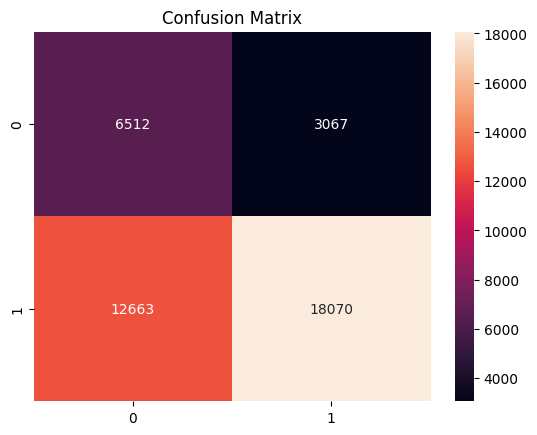

In [41]:
predictions=lr.predict(X_test)

cm=confusion_matrix(y_test,predictions)
plt.title('Confusion Matrix')
sns.heatmap(cm,annot=True,fmt="g")

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.34      0.68      0.45      9579
           1       0.85      0.59      0.70     30733

    accuracy                           0.61     40312
   macro avg       0.60      0.63      0.57     40312
weighted avg       0.73      0.61      0.64     40312



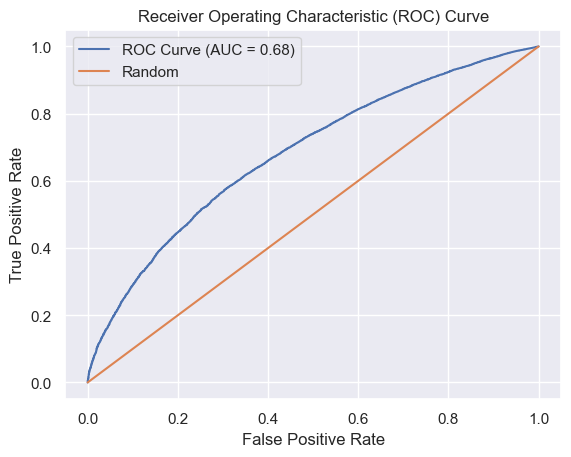

In [50]:
y_test_prob=lr.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
auc=roc_auc_score(y_test,y_test_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1],label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [65]:
card = toad.ScoreCard(
    combiner = combiner,
    transer = t,#
    class_weight = 'balanced',
    C=0.1,
    base_score = 800,
    base_odds = 35 ,
    pdo = 20,
    rate = 2
)


card.fit(X_train, y_train)
final_card = card.export(to_frame=True)  


In [66]:
final_card

,name,value,score
0,purpose,"small_business,educational,renewable_energy,other",75.67
1,purpose,"debt_consolidation,moving,medical,vacation,house",71.09
2,purpose,"home_improvement,credit_card",65.73
3,purpose,"wedding,major_purchase,car",61.45
4,verification_status,Verified,69.88
5,verification_status,Source Verified,69.72
6,verification_status,Not Verified,69.56
7,loan_to_income_ratio,[-inf ~ 0.0756),67.08
8,loan_to_income_ratio,[0.0756 ~ 0.14414414414414414),67.67
9,loan_to_income_ratio,[0.14414414414414414 ~ 0.1975),68.43


In [ ]:
final_card.to_csv('scorecard.csv')

## Run the scorecard on the test data

In [73]:
test['CreditScore'] = card.predict(X_test)


In [79]:
test.sample(10)

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,credit_history_tenure_years,credit_history_tenure_months,earliest_cr_line_month,credit_pull_months,loan_to_income_ratio,CreditScore
104233,18000,60 months,21.60,493.06,E3,10.0,MORTGAGE,100000.0,Verified,2013-08-01,1,debt_consolidation,13.52,0.0,2.0,6.0,0.0,18008,85.8,38.0,w,0.0,0.0,19277.53000,18000.00,1277.53,0.0,0.00,0.000,0.0,0.0,0.0,281588.0,21000.0,13.251198,159,5.0,-23,0.180000,653.029503
50719,4200,36 months,10.99,137.49,B2,7.0,MORTGAGE,57000.0,Verified,2013-12-01,1,credit_card,7.91,0.0,0.0,15.0,1.0,10223,65.1,54.0,f,0.0,0.0,4810.64424,4200.00,610.64,0.0,0.00,0.000,0.0,0.0,0.0,302426.0,15700.0,18.754278,225,3.0,-21,0.073684,657.369416
102837,14125,36 months,18.25,512.43,D2,7.0,OWN,54320.0,Not Verified,2013-08-01,1,home_improvement,13.80,1.0,2.0,19.0,0.0,9001,44.3,54.0,f,0.0,0.0,14340.07000,14125.00,215.07,0.0,0.00,0.000,0.0,0.0,0.0,14822.0,20300.0,18.253251,219,5.0,-17,0.260033,650.545040
97508,15000,36 months,7.62,467.43,A3,9.0,OWN,75000.0,Source Verified,2013-09-01,1,car,2.13,0.0,1.0,7.0,0.0,24776,52.3,14.0,w,0.0,0.0,16350.44000,15000.00,1350.44,0.0,0.00,0.000,0.0,0.0,0.0,315228.0,47400.0,8.832307,106,11.0,-25,0.200000,650.545040
77800,8500,36 months,17.10,303.48,C5,2.0,RENT,55000.0,Not Verified,2013-10-01,1,debt_consolidation,19.25,0.0,0.0,11.0,0.0,17754,68.8,21.0,w,0.0,0.0,9493.40000,8500.00,993.40,0.0,0.00,0.000,0.0,0.0,0.0,89585.0,25800.0,15.000684,180,10.0,-27,0.154545,653.029503
44010,10000,36 months,14.47,344.07,C2,10.0,RENT,79896.0,Verified,2013-12-01,0,credit_card,25.85,0.0,0.0,15.0,0.0,14993,74.2,40.0,f,0.0,0.0,5141.17000,2867.04,1261.78,0.0,1012.35,182.223,0.0,0.0,0.0,66674.0,20200.0,22.420260,269,7.0,-17,0.125163,655.792352
54918,3000,36 months,16.20,105.77,C4,6.0,RENT,28000.0,Not Verified,2013-12-01,1,medical,7.42,0.0,1.0,16.0,0.0,5517,15.4,23.0,f,0.0,0.0,3040.57000,3000.00,40.57,0.0,0.00,0.000,0.0,0.0,0.0,5517.0,35800.0,13.166324,158,10.0,-25,0.107143,655.792352
118053,14400,36 months,12.35,480.70,B4,10.0,RENT,88000.0,Source Verified,2013-07-01,1,credit_card,9.79,5.0,0.0,8.0,0.0,6623,60.8,34.0,f,0.0,0.0,15736.65218,14400.00,1336.65,0.0,0.00,0.000,0.0,0.0,0.0,29274.0,10900.0,17.916496,215,8.0,-30,0.163636,653.029503
77633,14200,36 months,15.10,492.95,C2,2.0,RENT,68000.0,Not Verified,2013-10-01,1,debt_consolidation,20.53,0.0,1.0,13.0,0.0,7272,30.9,22.0,f,0.0,0.0,15939.47092,14200.00,1739.47,0.0,0.00,0.000,0.0,0.0,0.0,36294.0,23500.0,8.914442,107,11.0,-27,0.208824,650.545040
97319,19200,36 months,6.62,589.52,A2,2.0,MORTGAGE,89000.0,Source Verified,2013-09-01,1,home_improvement,0.30,0.0,1.0,11.0,0.0,530,1.3,20.0,f,0.0,0.0,20161.14850,19200.00,961.15,0.0,0.00,0.000,0.0,0.0,0.0,363722.0,40800.0,7.504449,90,3.0,-18,0.215730,650.545040
